---------------
属于：Pooling Layers
-------------

-----------------

什么是池化？
最大池化操作：取池化核覆盖的输入图像部分的数值最大值。

如下图，就会取出2：

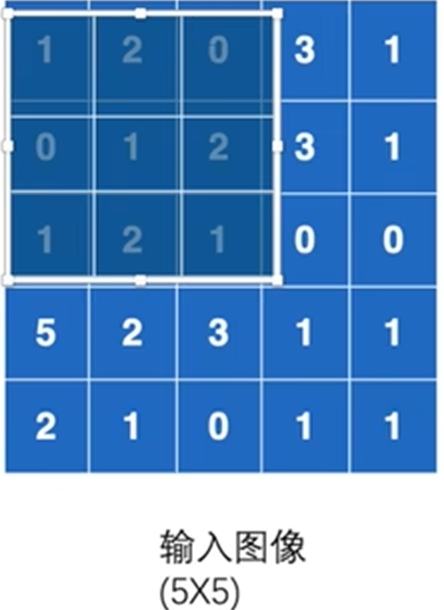

----------------------------------------------------------------------------------------------------------------------------------------

学习：https://docs.pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d

1、class torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)

ceil_mode：ceil是天花板，那些无法覆盖满池化层的部分也会被取到，如下图的部分，需要保留着6个数：

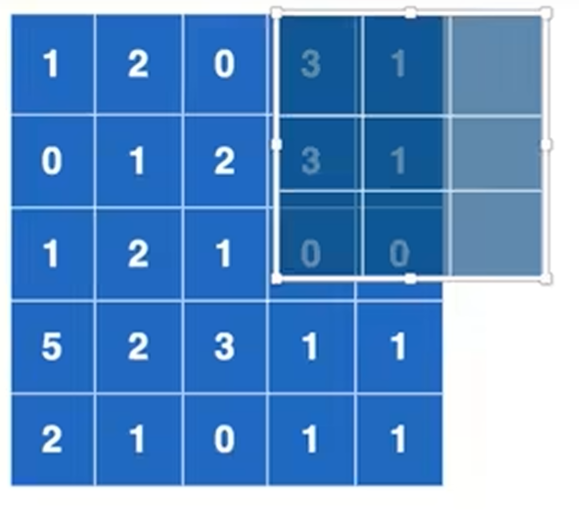

In [9]:
import torch
import torchvision
from torch.utils.data import DataLoader

dataset = torchvision.datasets.CIFAR10(root="./data", train=False, transform=torchvision.transforms.ToTensor(), download=True)
dataloader = DataLoader(dataset, batch_size=64)

input = torch.tensor([[1, 2, 0, 3, 1],
                      [0, 1, 2, 3, 1],
                      [1, 2, 1, 0, 0],
                      [5, 2, 3, 1, 1],
                      [2, 1, 0, 1, 1]], dtype=torch.float32)


100.0%


In [10]:
import torch.nn as nn
from torch.nn import MaxPool2d

class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()
        self.maxpool1 = MaxPool2d(kernel_size=3, ceil_mode = True)

    def forward(self, input):
        output = self.maxpool1(input)
        return output


In [ ]:
tudui = Tudui()
# output = tudui(input.unsqueeze(0))
# print(output.squeeze(0))

#从dataloader中取
from torch.utils.tensorboard import SummaryWriter

writer = torch.utils.tensorboard.SummaryWriter(log_dir="./logs_maxpool", comment="MaxPool2d")
step = 0

for data in dataloader:
    images, labels = data
    output = tudui(images)
    writer.add_images("input", images, step)
    writer.add_images("output", output, step)
    step += 1

writer.close()